<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/main/7.2%20Actividad%207.%20PCA/Actividad7PCA_Equipo04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: David A. Serrano Garcia
*   MATRÍCULA: A01795935
*   NOMBRE: Said Chávez Cervantes
*   MATRÍCULA: A01114101
*   NOMBRE: Erik Abel Cruz Yekon
*   MATRÍCULA: A01795929

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define enviroments constant names
DEFAULT = 'DEFAULT'
VARIANT = 'VARIANT'

# Define the environment settings in a dictionary
ENVIRONMENTS_CONFIG = {
    DEFAULT: {
        'base_path': '/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA'
    },
    VARIANT: {
        'base_path': '/content/drive/MyDrive/Colab Notebooks/Maestría MNA/Ciencia y Analítica de datos'
    }
}


In [ ]:
# Descomenta la configuración que vas a usar.
environment = DEFAULT
#environment = VARIANT

In [ ]:
base_path = ENVIRONMENTS_CONFIG[environment]['base_path']

In [ ]:
import os
DIR = base_path
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
dfn = cereals_df.select_dtypes(include=np.number).columns.tolist()
dfc = cereals_df.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
# Listar las columnas numéricas
numeric_columns = cereals_df.select_dtypes(include=np.number).columns

In [ ]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [ ]:
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


In [ ]:
# Obtener estadísticas descriptivas para todas las variables del dataframe
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


# Analysis visual Personal - Diagramas pre-procesamiento para nuestro mejor entendimiento de los datos.

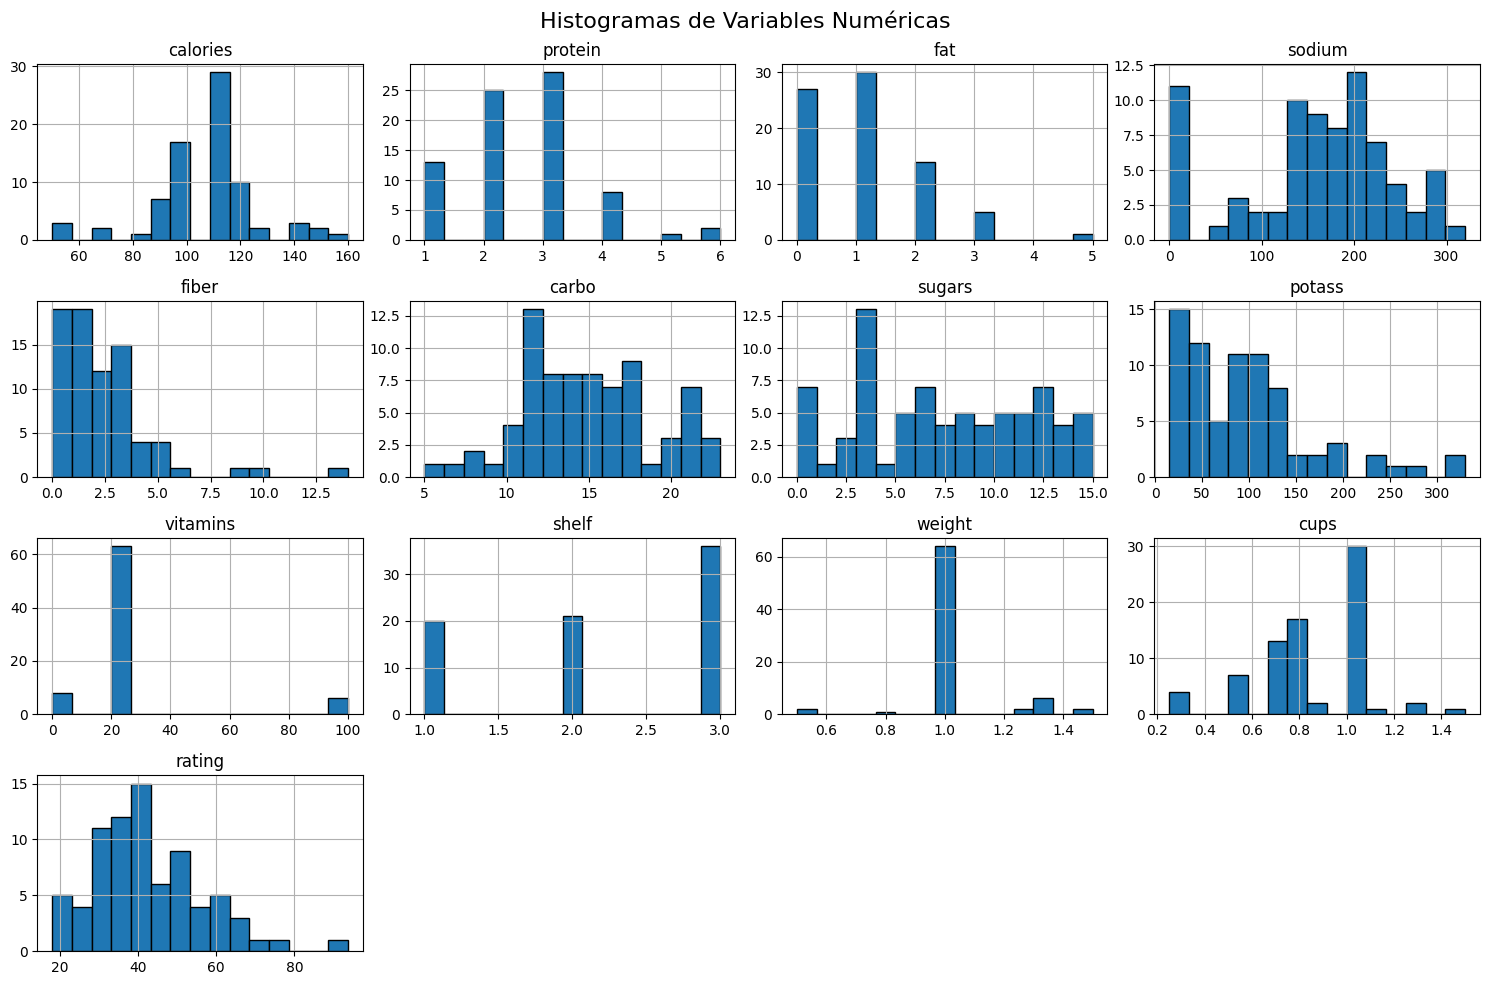

In [ ]:
# Crear histogramas para cada columna numérica
cereals_df[numeric_columns].hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

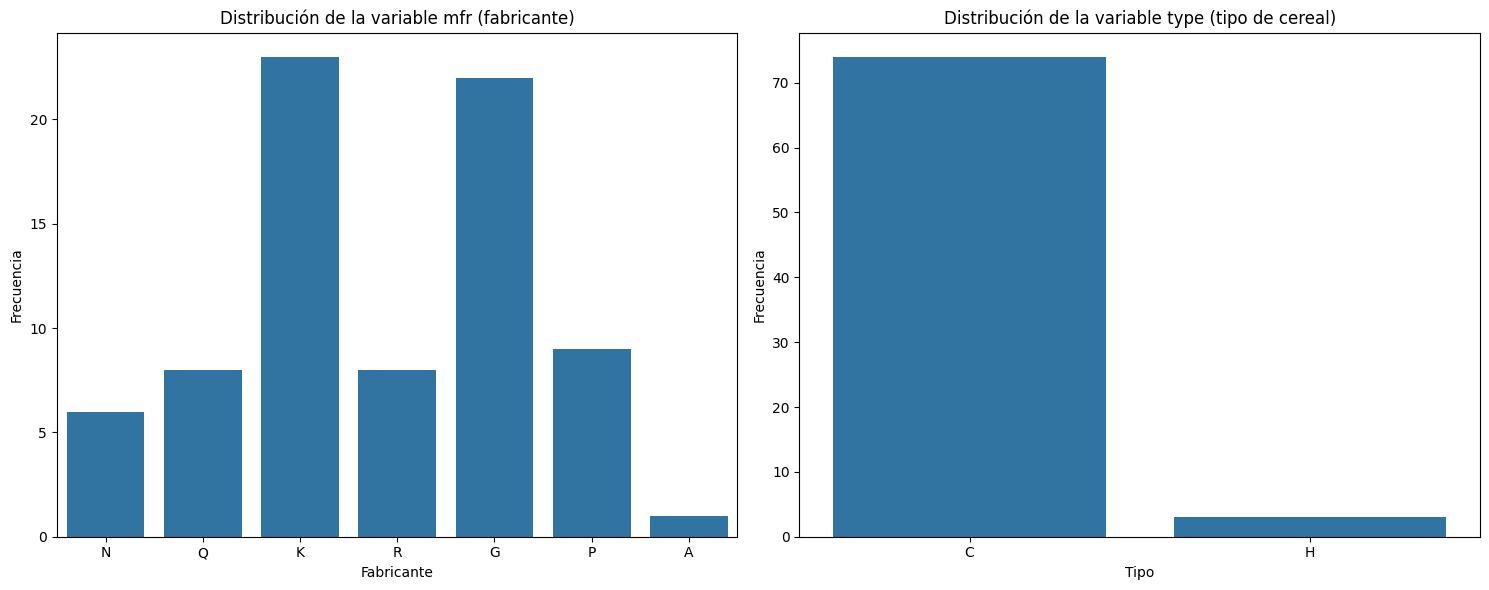

In [ ]:
# Diagramas de barras para variables categóricas 'mfr' y 'type' uno al lado del otro
plt.figure(figsize=(15, 6))

# Diagrama de barras para la variable categórica 'mfr'
plt.subplot(1, 2, 1)
sns.countplot(data=cereals_df, x='mfr')
plt.title('Distribución de la variable mfr (fabricante)')
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia')

# Diagrama de barras para la variable categórica 'type'
plt.subplot(1, 2, 2)
sns.countplot(data=cereals_df, x='type')
plt.title('Distribución de la variable type (tipo de cereal)')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

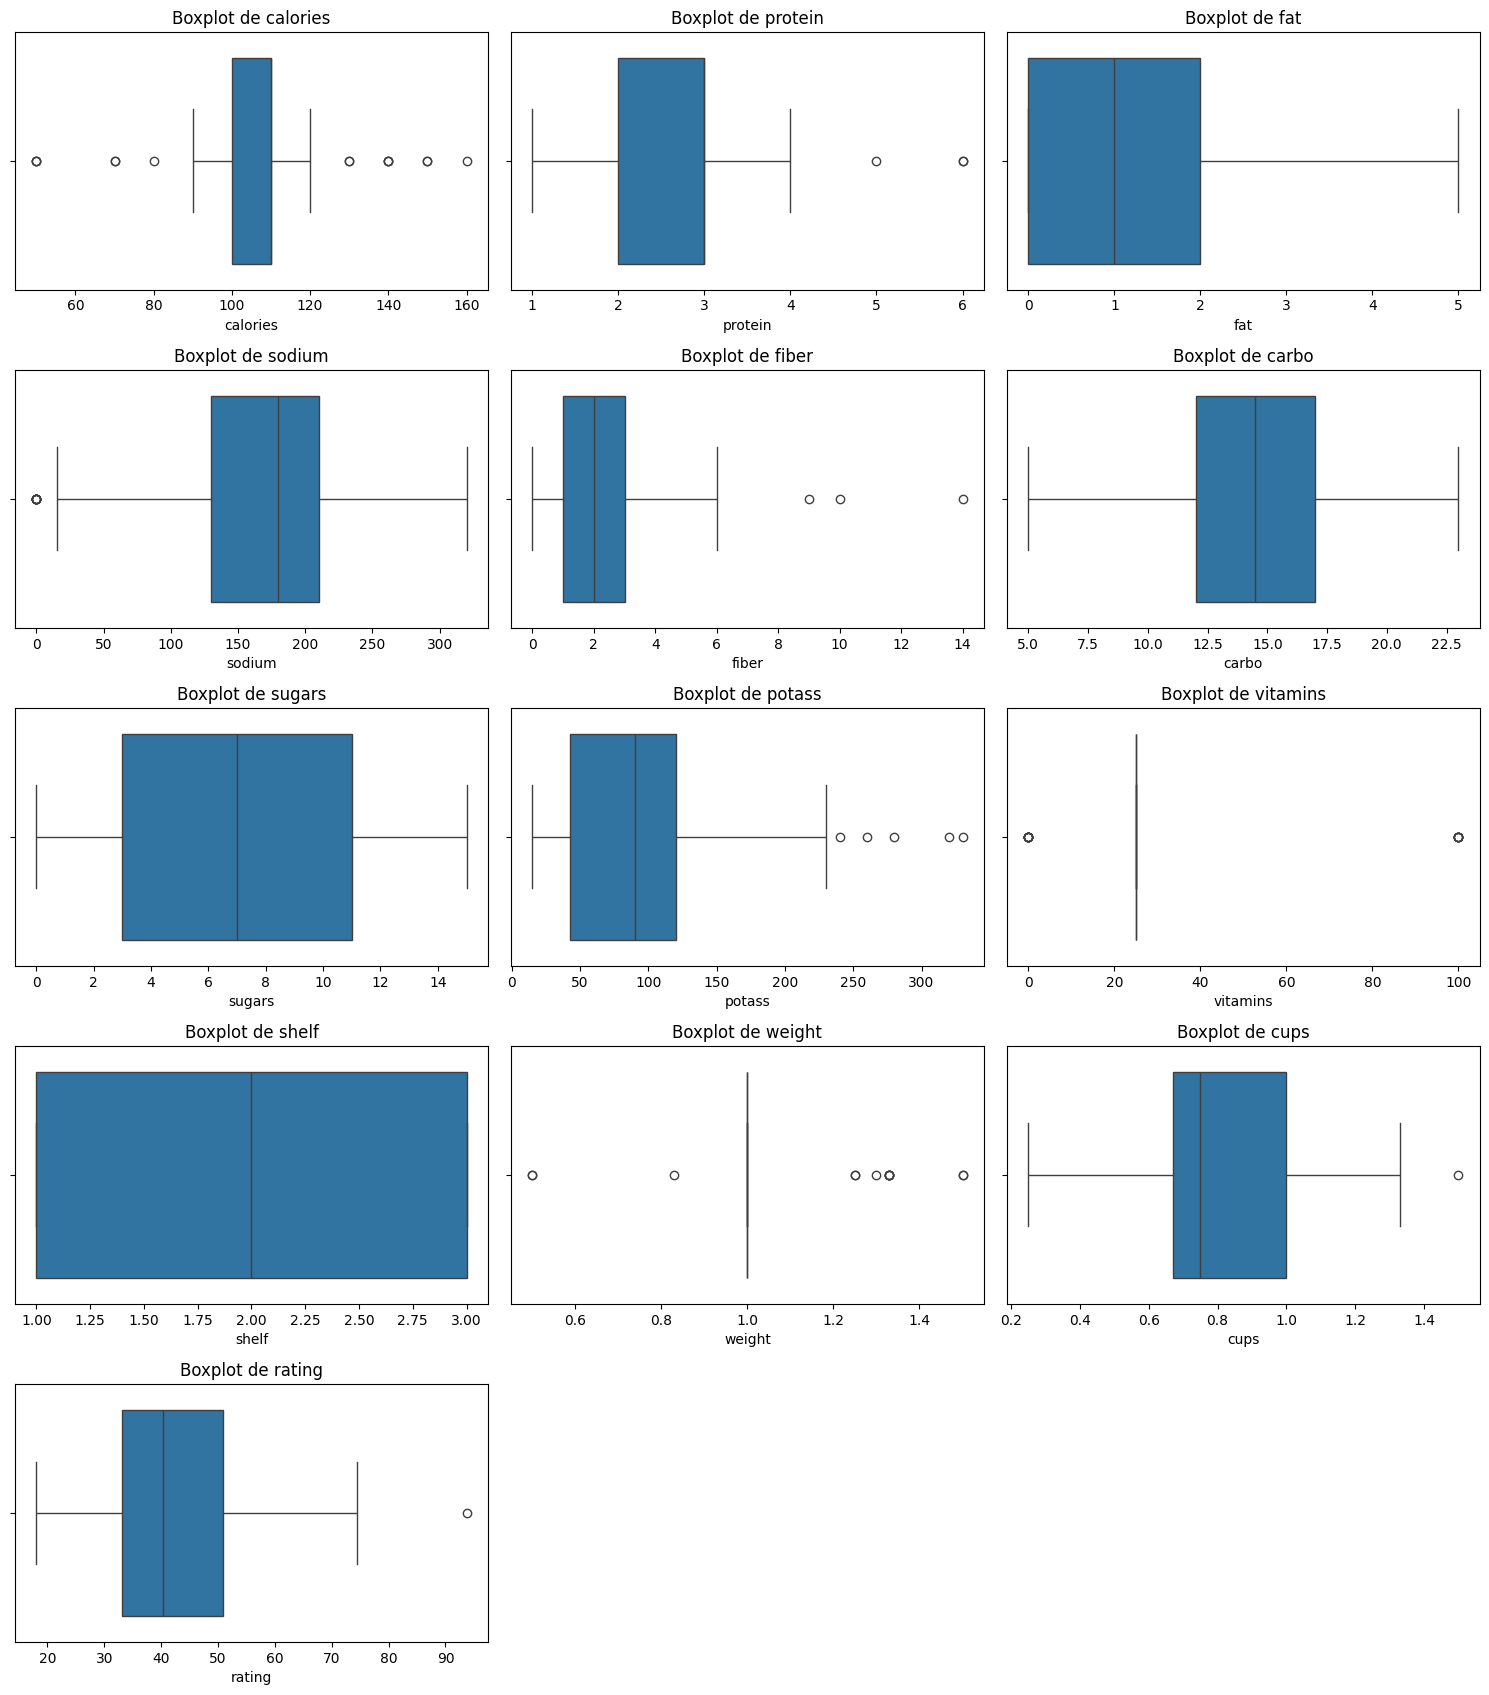

In [ ]:
# Boxplots horizontales para las variables numéricas
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(data=cereals_df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


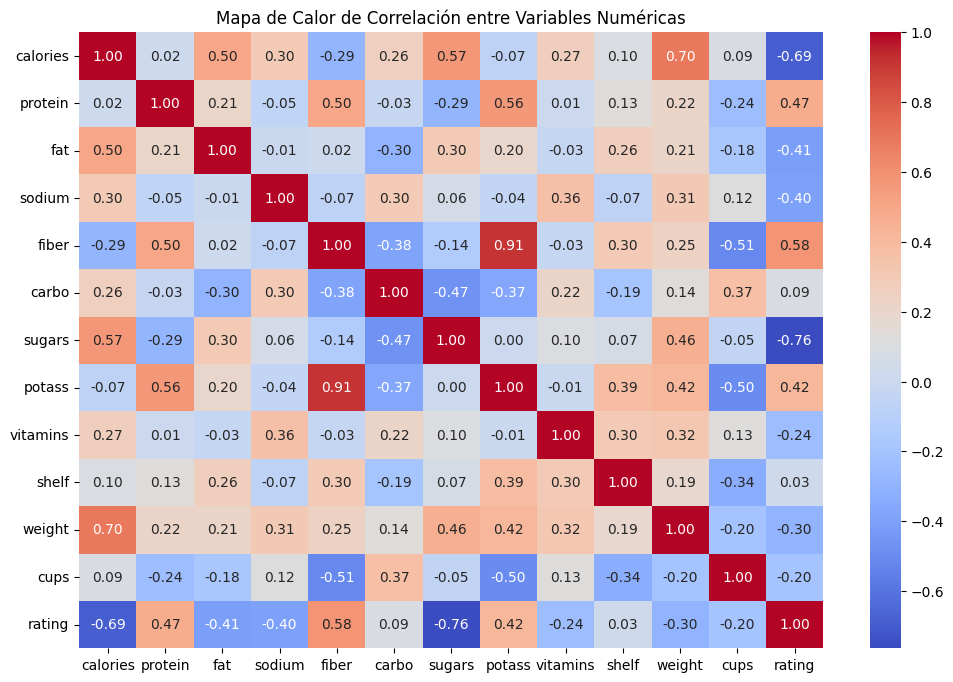

In [ ]:
# Heatmap de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = cereals_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

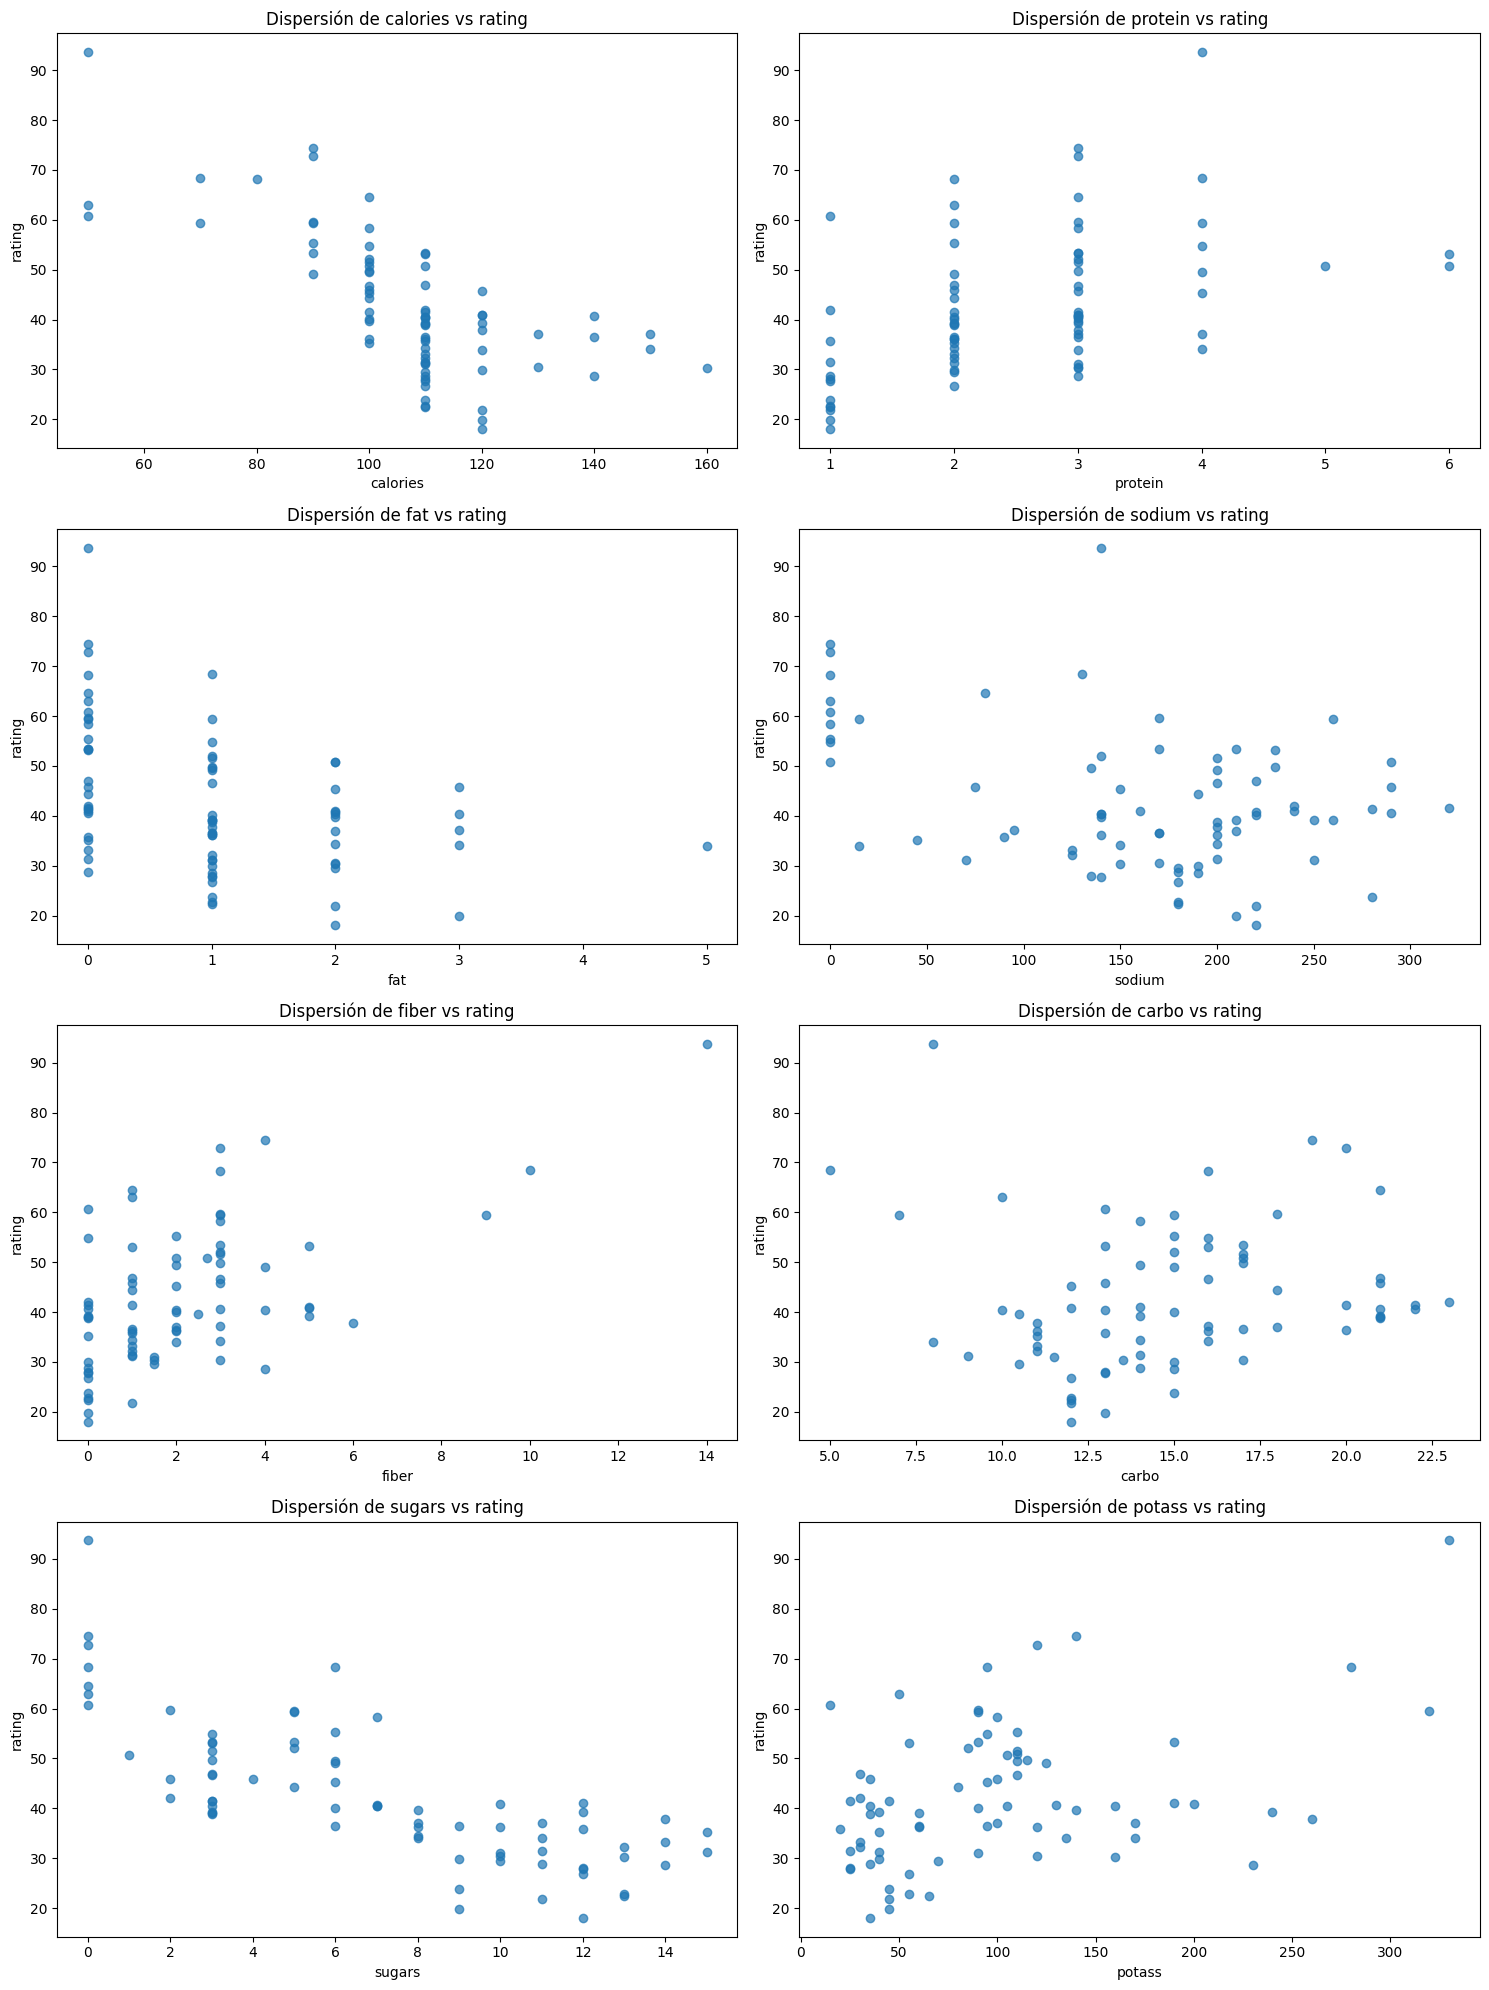

In [ ]:
# Crear pares de variables para graficar dispersión contra `rating`
scatter_pairs = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

# Crear diagramas de dispersión
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, var in zip(axes.flatten(), scatter_pairs):
    ax.scatter(cereals_df[var], cereals_df['rating'], alpha=0.7)
    ax.set_xlabel(var)
    ax.set_ylabel('rating')
    ax.set_title(f'Dispersión de {var} vs rating')

plt.tight_layout()
plt.show()

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

**mfr:**

**Kelloggs -	23**

**General Mills -	22**

**Post -	9**

**Quaker Oats -	8**

**Ralston Purina -	8**

**Nabisco -	6**

**American Home Food Products -	1**

**Shelf:**

**1 -	20**

**2	- 21**

**3 -	36**

In [ ]:
cereals_df['mfr'].value_counts().to_frame()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


In [ ]:
cereals_df['shelf'].value_counts().to_frame()

,count
shelf,
3,36
2,21
1,20


In [ ]:
for column in dfc:
    print(cereals_df[column].value_counts())
    print('-' * 50)

name
100%_Bran                    1
Nutri-Grain_Almond-Raisin    1
Quaker_Oat_Squares           1
Puffed_Wheat                 1
Puffed_Rice                  1
                            ..
Frosted_Flakes               1
Froot_Loops                  1
Double_Chex                  1
Crispy_Wheat_&_Raisins       1
Wheaties_Honey_Gold          1
Name: count, Length: 77, dtype: int64
--------------------------------------------------
mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64
--------------------------------------------------
type
C    74
H     3
Name: count, dtype: int64
--------------------------------------------------


<Axes: xlabel='mfr', ylabel='count'>

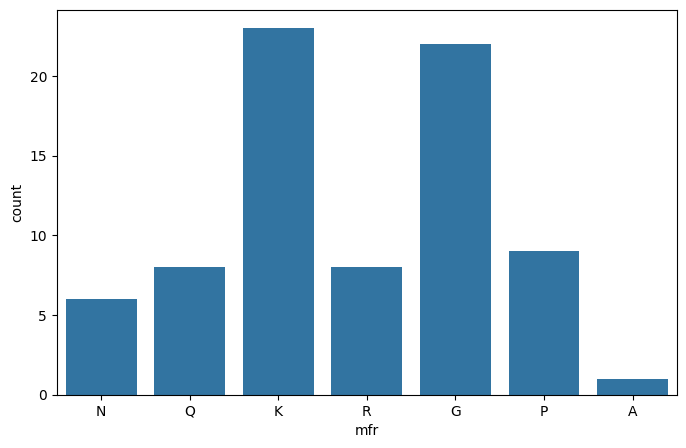

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x='mfr', data=cereals_df)

<Axes: xlabel='shelf', ylabel='count'>

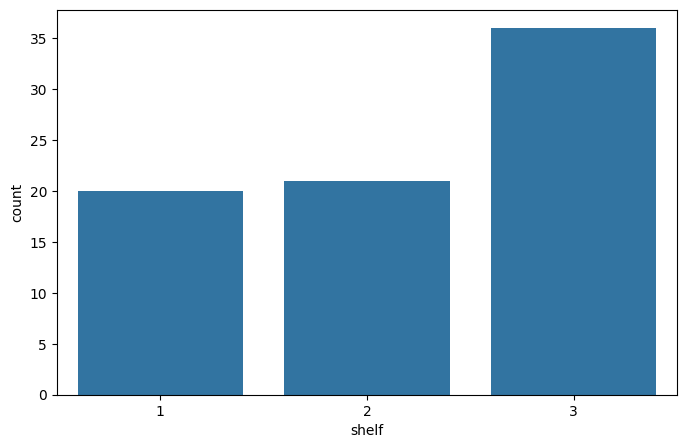

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(x='shelf', data=cereals_df)

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

**Kelloggs -	4 en Shelf 1, 7 en Shelf 2 y 12 en Shelf 3.**

**General Mills -	6 en Shelf 1, 7 en Shelf 2 y 9 en Shelf 3.**

**Post -	2 en Shelf 1, 1 en Shelf 2 y 6 en Shelf 3.**

**Quaker Oats -	1 en Shelf 1, 3 en Shelf 2 y 4 en Shelf 3.**

**Ralston Purina -	4 en Shelf 1, 0 en Shelf 2 y 4 en Shelf 3.**

**Nabisco -	3 en Shelf 1, 2 en Shelf 2 y 1 en Shelf 3.**

**American Home Food Products -	0 en Shelf 1, 1 en Shelf 2 y 0 en Shelf 3.**

<Axes: xlabel='mfr', ylabel='count'>

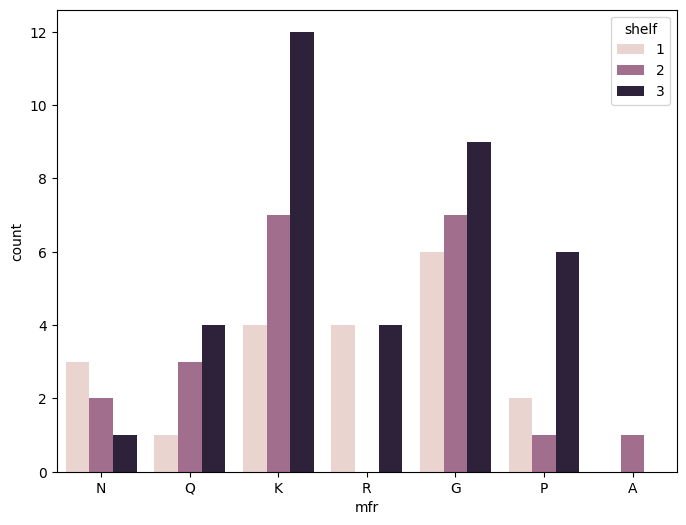

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x='mfr', data=cereals_df, hue='shelf')

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

**El rango más frecuente de la variable rating es entre 33.174094 y 50.828392, tal cómo se muestra en la gráfica.**

In [ ]:
Q1 = cereals_df['rating'].quantile(0.25)
Q3 = cereals_df['rating'].quantile(0.75)
print("El rango más frecuente de la variable rating es entre",Q1,"y",Q3)

El rango más frecuente de la variable rating es entre 33.174094 y 50.828392


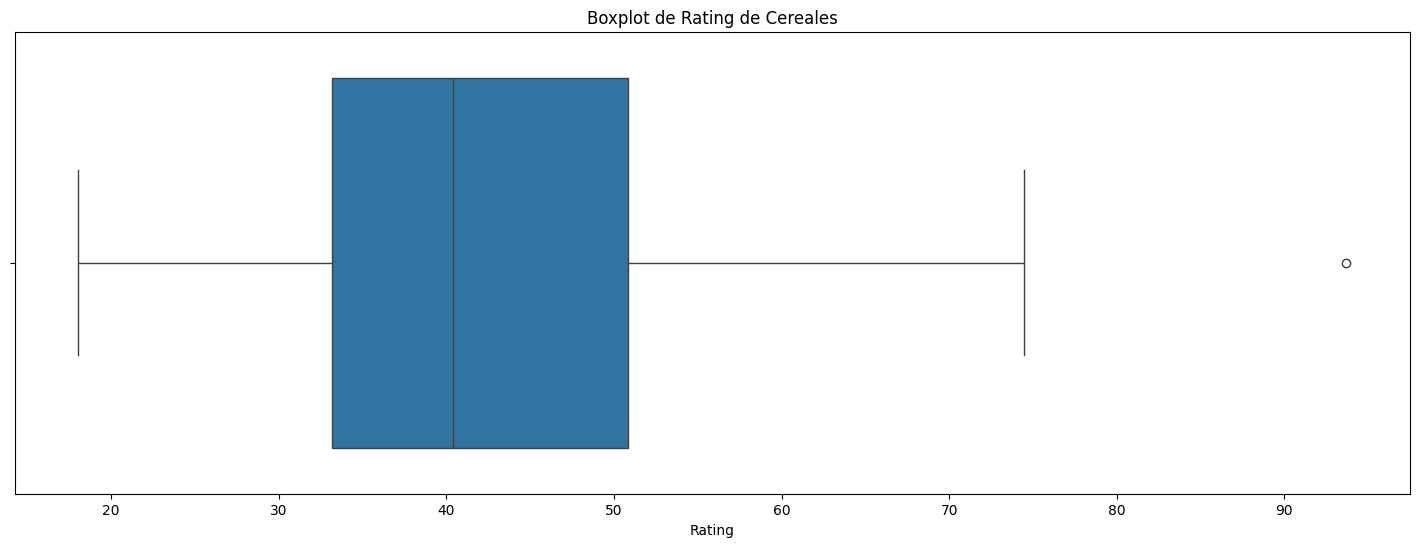

In [ ]:
# Crear el boxplot para la variable 'rating' con un gráfico más largo horizontalmente
plt.figure(figsize=(18, 6))
sns.boxplot(x=cereals_df['rating'])
plt.xlabel('Rating')
plt.title('Boxplot de Rating de Cereales')
plt.show()

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

**1.- All-Bran_with_Extra_Fiber -	Kellogs	(93.704912).**

**2.- Shredded_Wheat_'n'Bran -	Nabisco	(74.472949).**

**3.- Shredded_Wheat_spoon_size	- Nabisco	(72.801787).**

**4.- 100%_Bran	- Nabisco	(68.402973).**

**5.- Shredded_Wheat -	Nabisco	(68.235885).**

**6.- Cream_of_Wheat_(Quick) -	Nabisco	(64.533816).**

**7.- Puffed_Wheat -	Quaker Oats	(63.005645).**

**8.- Puffed_Rice	Quaker - Oats	(60.756112).**

**9.- Nutri-grain_Wheat	- Kellogs	(59.642837).**

**10.- All-Bran	Kellogs -	(59.425505).**

In [ ]:
cereals_df[['name','mfr','rating']].sort_values('rating', ascending=False)[0:10]

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


In [ ]:
# Obtener los 10 cereales mejor evaluados
top_10_cereals = cereals_df.nlargest(10, 'rating')[['name', 'mfr', 'rating']]
top_10_cereals

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


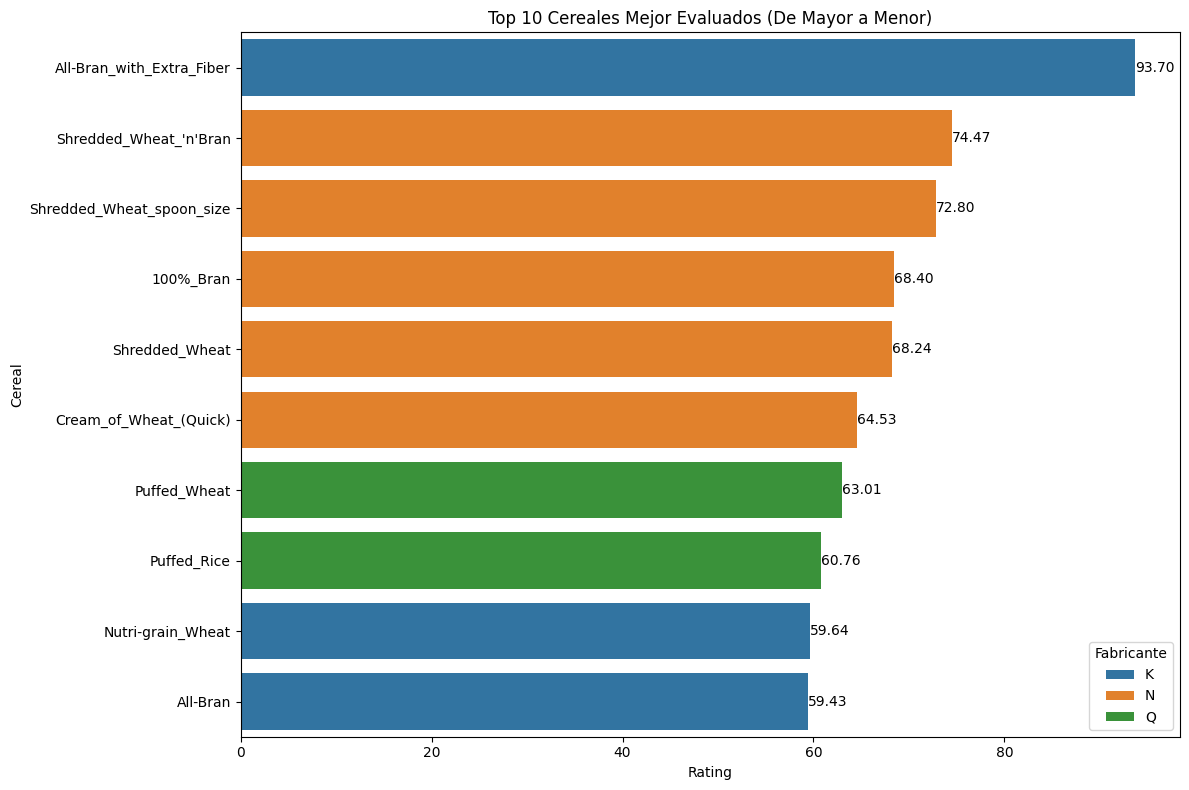

In [ ]:
# Ordenar los cereales por su rating de mayor a menor para una mejor visualización
top_10_cereals_sorted_desc = top_10_cereals.sort_values(by='rating', ascending=False)

# Crear el gráfico de barras de mayor a menor
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_10_cereals_sorted_desc, x='rating', y='name', hue='mfr', dodge=False)
plt.title('Top 10 Cereales Mejor Evaluados (De Mayor a Menor)')
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.legend(title='Fabricante')

# Añadir los números al final de cada barra
for index, value in enumerate(top_10_cereals_sorted_desc['rating']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

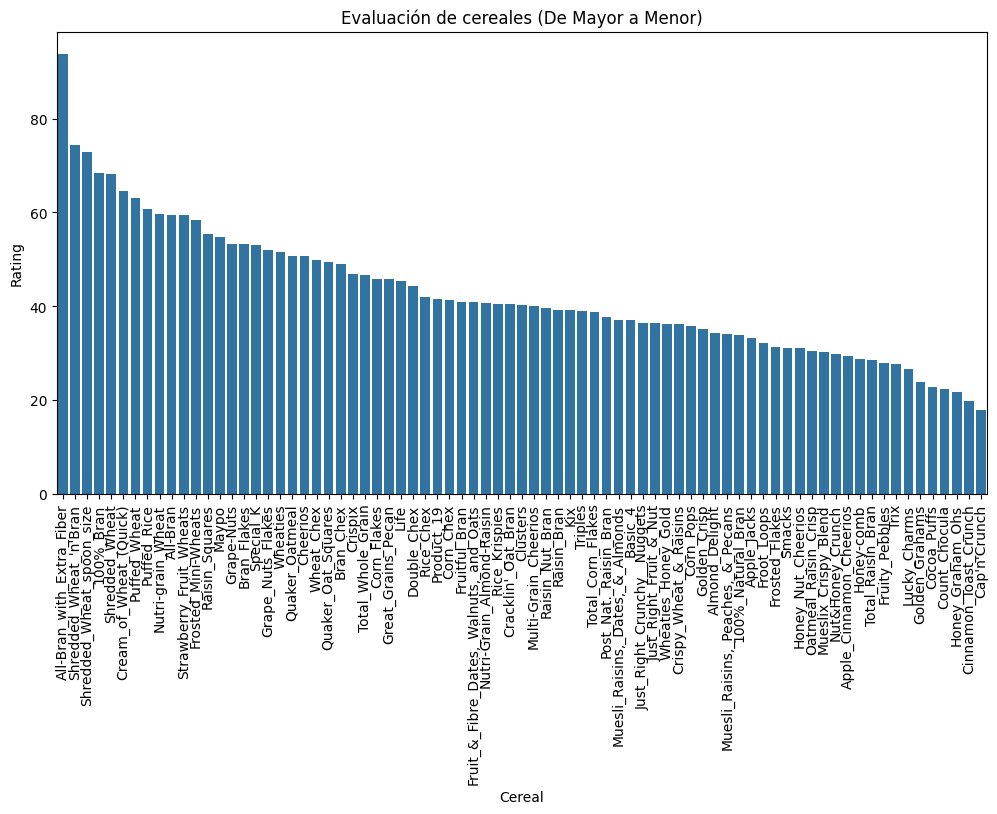

In [ ]:
# Ordenar el dataframe por rating de mayor a menor
sorted_cereals = cereals_df.sort_values(by='rating', ascending=False)

# Crear el gráfico de barras con los cereales ordenados de mayor a menor
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_cereals['name'], y=sorted_cereals['rating'])
plt.xticks(rotation=90)
plt.xlabel('Cereal')
plt.ylabel('Rating')
plt.title('Evaluación de cereales (De Mayor a Menor)')
plt.show()

In [ ]:
cereals_df[['name','mfr','rating']]

,name,mfr,rating
0,100%_Bran,N,68.402973
1,100%_Natural_Bran,Q,33.983679
2,All-Bran,K,59.425505
3,All-Bran_with_Extra_Fiber,K,93.704912
4,Almond_Delight,R,34.384843
...,...,...,...
72,Triples,G,39.106174
73,Trix,G,27.753301
74,Wheat_Chex,R,49.787445
75,Wheaties,G,51.592193


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

**Se puede observar que el fabricante Nabisco tiene el menor rango de calorias registrado, mientras que llama la atención cómo el nivel de calorias de American Home Food Products y General Mills es bastante constante.**

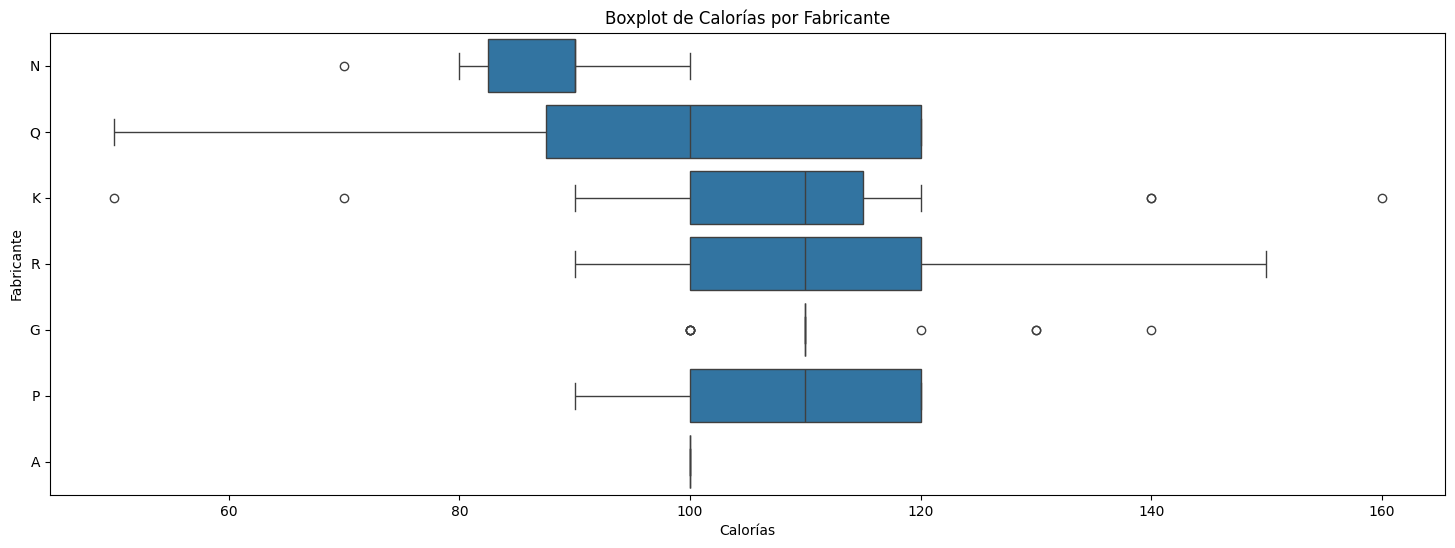

In [ ]:
# Crear el boxplot para la variable 'calories' por 'mfr' con un gráfico más largo horizontalmente
plt.figure(figsize=(18, 6))
sns.boxplot(x=cereals_df['calories'], y=cereals_df['mfr'])
plt.xlabel('Calorías')
plt.ylabel('Fabricante')
plt.title('Boxplot de Calorías por Fabricante')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

**Fibra (0.58) y Proteína (0.47).**

<Axes: >

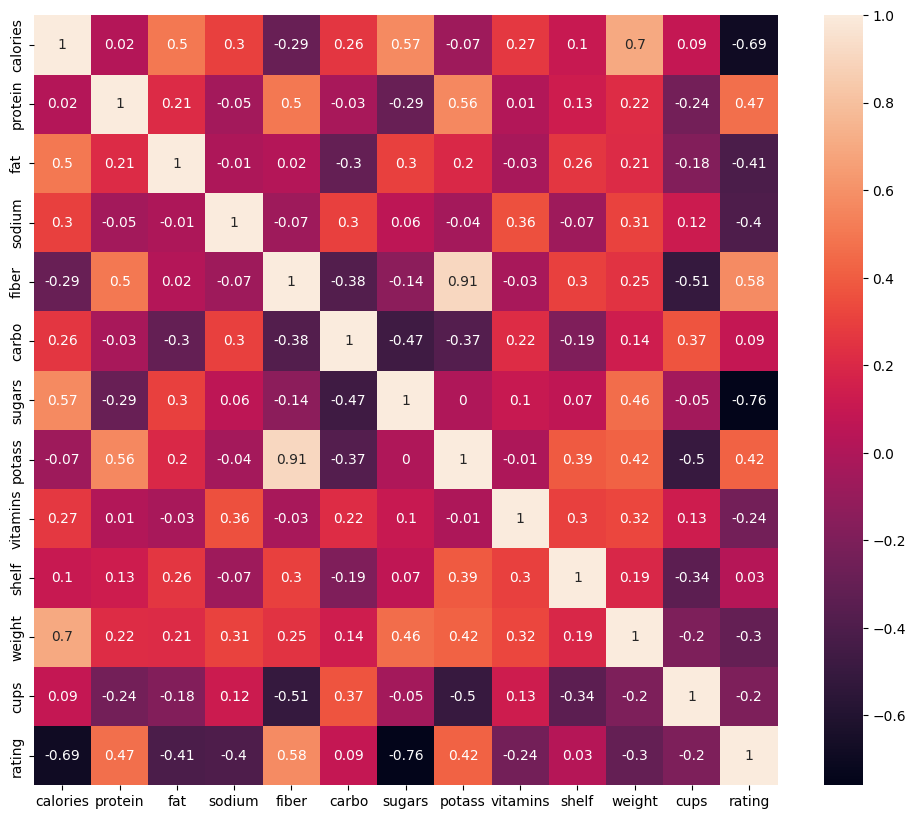

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
cereals_df2 = cereals_df.dropna().reset_index(drop=True)
cereals_df2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
#seprara rl objetivo
y=cereals_df2.loc[:,'rating']
#serpara los predictores
x=cereals_df2.iloc[:,3:-1]

In [ ]:
total_componentes=x.shape[1]

In [ ]:
#escalar los datos
from sklearn.preprocessing import StandardScaler
escalar=StandardScaler()
x_scaled=escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA
pca=PCA()
x_projected=pca.fit_transform(x_scaled)
x_projected=pd.DataFrame(x_projected)

In [ ]:
#Nuevo espacio de Vectores
print("Valores propios", list(np.round(pca.explained_variance_,decimals=8)))

Valores propios [3.36484971, 2.68343251, 1.81049205, 1.0315095, 0.99776211, 0.69922773, 0.66888458, 0.42176628, 0.31802842, 0.09305466, 0.05706436, 0.01831167]


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

Para obtener mas del 90% de de la varianza debe de tener un minimo de 7 componentes

In [ ]:
print("Varianza acumulada", np.cumsum(pca.explained_variance_ratio_))

Varianza acumulada [0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


Las tres variables principales del primer componenete son:

*   potass
*   Fiber
*   cups







In [ ]:
num_components=12
pc_df=pd.DataFrame(abs(pca.components_[:num_components]), columns=x.columns, index=['Principal componente {}'.format(i) for i in range(1, num_components+1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal componente 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal componente 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal componente 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal componente 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal componente 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal componente 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295
Principal componente 7,0.062276,0.260647,0.247778,0.608269,0.095668,0.026962,0.186843,0.147455,0.168034,0.124162,0.186826,0.593052
Principal componente 8,0.004882,0.418610,0.054129,0.167525,0.218240,0.172049,0.067793,0.265667,0.460537,0.416013,0.076551,0.500321
Principal componente 9,0.043225,0.518397,0.438048,0.247337,0.258082,0.135796,0.251199,0.186550,0.337770,0.415500,0.067996,0.045104
Principal componente 10,0.495843,0.019565,0.147950,0.005456,0.292832,0.243900,0.247413,0.185987,0.051953,0.047086,0.692720,0.077575


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.





* **name**: (NO) Esta variable es simplemente una etiqueta única para cada cereal. No es útil como predictor porque no tiene una relación inherente con las características nutricionales o el rating.
* **mfr**: (SI) Esta variable representa el fabricante del cereal. Puede ser un predictor útil ya que diferentes fabricantes pueden tener distintas fórmulas y calidades que afectan las características nutricionales y el rating.
* **type**: (SI) También puede ser un predictor útil porque los tipos de cereales pueden tener diferentes perfiles nutricionales.





> Dejamos comentado el usar OneHotEncoder de sklearn por el momento solo usaremos get_dummies()


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

In [ ]:
# # Crear el encoder
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# # Ajustar y transformar las variables categóricas
# encoded_array = encoder.fit_transform(cereals_df[['mfr', 'type']])

# # Convertir el resultado a un DataFrame
# encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['mfr', 'type']))
# encoded_df.head()

In [ ]:
# Aplicar One-Hot Encoding a las variables categóricas 'mfr' y 'type'
encoded_df = pd.get_dummies(cereals_df[['mfr', 'type']], drop_first=True)

# Mostrar el resultado del encoding
encoded_df.head()

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
# Resetear el índice de cada dataframe
pc_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
# Conjuntar los componentes principales (pc_df), las variables categóricas codificadas y la variable de salida
final_df = pd.concat([pc_df, encoded_df, y], axis=1)

# Guardar el dataframe resultante en un archivo CSV en Google Drive
output_path = "Actividad7PCA_Equpo04-Final_Cereals.csv"
final_df.to_csv(output_path, index=False)

# Mostrar el dataframe resultante
final_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154,False,False,True,False,False,False,False,68.402973
1,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553,False,False,False,False,True,False,False,33.983679
2,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695,False,True,False,False,False,False,False,59.425505
3,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683,False,True,False,False,False,False,False,93.704912
4,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826,False,False,False,False,False,True,False,29.509541
